# Report on:
## Bank Note Authentication using KNN

### Course:
- PROGRAMMING IN PYTHON 

### Course Teacher:
- DR. MD. MAHBUB CHOWDHURY MISHU

### Group Member:
- Roslin Mahmud Joy 17-34328-1
- Rohan, Samiul Islam 17-34280-1
- Riyan, Md Rafeu 17-33977-1

## A. Background of the problem
<p>Banknotes are one of the most important assets of a country. Some miscreants introduce fake notes which bear a resemblance to original note to create discrepancies of the money in the financial market. It is difficult for humans to tell true and fake banknotes apart especially because they have a lot of similar features. There has been a drastic increase in the rate of fake notes in the market. Fake money is an imitation of the genuine notes and is created illegally for various motives. These fake notes are created in all denominations which brings the financial market of the country to a low level. The various advancements in the field of scanners and copy machines have led the miscreants to create copies of banknotes. It is difficult for human-eye to recognize a fake note because they are created with great accuracy to look alike a genuine note. Security aspects of banknotes have to be considered and security features are to be introduced to mitigate fake currency. Hence, there is a dire need in banks and ATM machines to implement a system that classifies a note as genuine or fake. In the recent years, Soft computing techniques have been widely used to solve problems that are difficult to solve using conventional mathematical methods. Supervised learning techniques are widely used in classification problems. This paper evaluates supervised machine learning algorithms to classify genuine and fake notes, and compares algorithms on the basis of accuracy, sensitivity, and specificity. Consider someone wants to deposit money in the bank. The notes that are to be deposited are given to a human being to check for their authenticity. As the fake notes are prepared with precision, it is difficult to differentiate them from genuine ones. A recognition system must be installed to detect legitimacy of the note. The system should extract the features of the note using image processing techniques. These features will be given as input to the machine learning algorithm which will predict if the note is true or fake. Supervised machine learning techniques such as BPN and SVM were implemented. The dataset used to train these algorithms was collected by extracting features from banknote images. The dataset also classifies all the samples into a particular class i.e. genuine or forged. A comparative study of these techniques with respect to their accuracy, sensitivity, specificity and precision rate is shown.</p>

## B. Dataset Description
The dataset used to train the models is taken from UCI machine learning repository . Data were extracted from genuine and counterfeit banknote images. The dataset has 1372 instances. There are 5 attributes out of which 4 are the features and one is the target attribute. The dataset contains a balanced ratio of both classes which is 55:45(genuine: counterfeit). The target class contains two values: 0 and 1 where 0 represents genuine note and 1 represents fake note. Dataset description are given below according to attribute name:

**Variance of Wavelet Transformed Image:** This attribute is continuous type. This attribute finds how each pixel varies from the neighboring pixels and classifies them into different regions.

**Skewness of Wavelet Transformed image:** This attribute is continuous type. Skewness is the measure of the lack of symmetry.

**Kurtosis of Wavelet Transformed image:** This is continuous type attribute. Kurtosis is a measure of whether the data are heavytailed or light-tailed relative to a normal distribution.

**Entropy of image:** This is also a continuous type attribute. Image entropy is a quantity which is used to describe the amount of information which must be coded for, by a compression algorithm.

**Class:** This is integer type variable. Class contains two values 0 representing genuine note and 1 representing fake note.


## C. Explanation of KNN Algorithm

### Introduction
K-nearest neighbors (KNN) algorithm is a type of supervised ML algorithm which can be used for both classification as well as regression predictive problems. However, it is mainly used for classification predictive problems in industry.

### Working of KNN Algorithm
K-nearest neighbors (KNN) algorithm uses ‘feature similarity’ to predict the values of new datapoints which further means that the new data point will be assigned a value based on how closely it matches the points in the training set. We can understand its working with the help of following steps −

**Step 1** − For implementing any algorithm, we need dataset. So during the first step of KNN, we must load the training as well as test data.

**Step 2** − Next, we need to choose the value of K i.e. the nearest data points. K can be any integer.

**Step 3** − For each point in the test data do the following −

*3.1* − Calculate the distance between test data and each row of training data with the help of any of the method namely: Euclidean, Manhattan or Hamming distance. The most commonly used method to calculate distance is Euclidean.

*3.2* − Now, based on the distance value, sort them in ascending order.

*3.3* − Next, it will choose the top K rows from the sorted array.

*3.4* − Now, it will assign a class to the test point based on most frequent class of these rows.

**Step 4** − End

## D. Implementation of the case in python

In [33]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
from scipy.spatial.distance import euclidean
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_score, recall_score

In [34]:
# Creating custom KNN classifier
class kNN:
    def fit(self, x_train, y_train):
        self.x_train = np.array(x_train)
        self.y_train = np.array(y_train)
    def predict(self, x_test):
        x_test = np.array(x_test)
        predictions = np.empty(len(x_test), dtype=y_train[0].dtype)
        for t, test in enumerate(x_test):
            ind = 0 
            dis = euclidean(x_test[0] , self.x_train[0])
            for i, train in enumerate(self.x_train):
                tt_dis = euclidean(test,train)
                if tt_dis < dis:
                    dis = tt_dis
                    ind = i
            predictions[t] = self.y_train[ind]
        return predictions

In [35]:
#1 Loading dataset & labeling the features
df = pd.read_csv('data_banknote_authentication.txt', 
    names=['variance', 'skewness', 'curtosis', 'entropy', 'class'])

In [36]:
#2 Processing data for Spliting & Training
X = df[['variance', 'skewness', 'curtosis', 'entropy']]
Y = df['class']

In [37]:
#2 Spliting the data into train, test parts
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [38]:
#3 Scaling data in range(0-1) for better performance/prediction
X_train =pd.DataFrame(MinMaxScaler().fit_transform(X_train),columns=X_train.columns)
X_test =pd.DataFrame(MinMaxScaler().fit_transform(X_test),columns=X_test.columns)

In [39]:
#4 importing k-nearest neighbors classifier(Sklearn)
KNN = KNeighborsClassifier()

In [40]:
#4 training the classifier
KNN.fit(X_train, y_train)
# Predictions of the classifier
predictions = KNN.predict(X_test)
print(predictions)

[0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0
 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 1
 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0
 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1
 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 1 1
 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 0
 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0]


In [41]:
#5 precision accuracy of Sklearn KNN
precision_score(y_test, predictions)

1.0

In [42]:
# recall_score of KNN
recall_score(y_test, predictions)

1.0

In [43]:
#4 importing k-nearest neighbors classifier(Custom)
kNN = kNN()

In [44]:
#4 training the classifier
kNN.fit(X_train, y_train)
# Predictions of the classifier
predictions = kNN.predict(X_test)
print(predictions)

[0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0
 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 1
 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0
 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1
 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 1 1
 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 0
 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0]


In [45]:
#5 precision accuracy of custom KNN
precision_score(y_test, predictions)

1.0

Text(0, 0.5, 'Class')

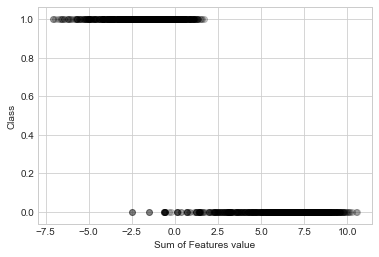

In [46]:
#6 Data visualizing using matplotlib
x = df['variance']+df['skewness']+df['curtosis']+df['entropy']
y = df['class']
plt.scatter(x, y, color='black', alpha=0.2)
plt.xlabel("Sum of Features value")
plt.ylabel("Class")

Text(0.5, 1.0, 'Counterfeit pie chart')

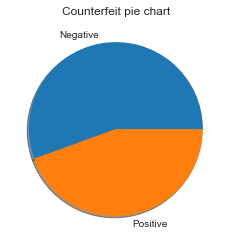

In [47]:
figpie, axpie = plt.subplots()
labels = 'Negative', 'Positive'
sizes = df['class'].value_counts().tolist()
axpie.pie(sizes, labels=labels, shadow=True)
axpie.set_title("Counterfeit pie chart")

## E. Analysis of your result
### Divide the Data into Features and Labels
Machine learning algorithms require data where features and labels are separated from each other. The label means the output class or output category. In our dataset, variance, skew, curtosis, and entropy are features whereas the class column contains the label.
### Training and Testing the Algorithm
After preprocessing the data, we trained the algorithm using the training set and evaluated the performance of our algorithm on the test set. We used K-Nearest Neighbors which is the most naive used algorithms for machine learning classification problems.
### Scatter plot
The scatter plot show class variance. It is clear that summation of feature for positive bank note is less relative to negative bank note feature summation.
### Pie chart
The chart describe the class distribution of negative & posive class amaount. 

## F. Discussion
The data file banknote_authentication.csv is the source of information for the classification problem. The number of instances (rows) in the data set is 1372, and the number of variables (columns) is 5.

In that way, this problem has the following variables:

- variance_of_wavelet_transformed, used as input.
- skewness_of_wavelet_transformed, used as input.
- curtosis_of_wavelet_transformed, used as input.
- entropy_of_image, used as input.
- class, used as target. It can only have two values: 0 (false) or 1 (true).

The instances are divided into training, selection and testing subsets. There are 824 instances for training (60%), 274 instances for selection (20%) and 274 instances for testing (20%).